In [111]:
import pandas as pd

In [112]:
df=pd.read_excel(r'C:\Users\leer\Desktop\Big Data\kawaba prediction.xlsx')
df

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank,Total Underage
0,2019-01-01,1171,0,9.2,0,4.4,2400,412
1,2019-01-02,2158,0,7.8,0,4.7,3000,789
2,2019-01-03,2422,0,7.0,0,3.0,3000,879
3,2019-01-04,2730,0,9.3,0,4.2,3000,768
4,2019-01-05,2500,0,8.5,0,6.1,3000,656
...,...,...,...,...,...,...,...,...
522,2022-04-15,85,0,0.0,555,10.7,800,1
523,2022-04-16,730,0,9.3,476,11.7,2400,28
524,2022-04-17,1205,0,5.4,513,12.0,3000,70
525,2022-04-23,448,0,7.8,349,20.1,3000,10


<AxesSubplot:>

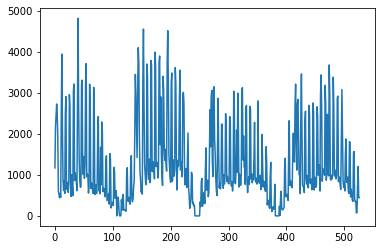

In [113]:
NOV=df['Number of visitor']
NOV.plot()

In [114]:
date=pd.to_datetime(df['date'])
date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
522   2022-04-15
523   2022-04-16
524   2022-04-17
525   2022-04-23
526   2022-04-24
Name: date, Length: 527, dtype: datetime64[ns]

In [115]:
month=date.dt.month
day=date.dt.weekday
Number_of_visitor=df['Number of visitor']

In [116]:
df2=pd.DataFrame(data=[Number_of_visitor, month, day]).T
df2.columns=['visitor','month','day']
df2

,visitor,month,day
0,1171,1,1
1,2158,1,2
2,2422,1,3
3,2730,1,4
4,2500,1,5
...,...,...,...
522,85,4,4
523,730,4,5
524,1205,4,6
525,448,4,5


In [189]:
df3=pd.merge(df2, df['Holiday Rank'], left_index=True, right_index=True)
df3.iloc[213:227]

,visitor,month,day,Holiday Rank
213,1201,3,3,800
214,1233,3,4,800
215,2685,3,5,2400
216,3554,3,6,2400
217,1121,3,0,800
218,1328,3,1,800
219,1112,3,2,800
220,954,3,3,800
221,2953,3,4,2400
222,3012,3,5,3000


In [118]:
X, y= [],[]

for i in range(7,len(df)-7):
    X.append(df3[i-7:i])
    y.append(df3['visitor'][i:i+7])

In [119]:
import numpy as np
X,y=np.array(X,dtype="object"),np.array(y,dtype="object")

In [120]:
X.shape, y.shape

((513, 7, 4), (513, 7))

In [121]:
y

array([[531, 443, 554, ..., 2442, 3948, 2104],
       [443, 554, 450, ..., 3948, 2104, 870],
       [554, 450, 2442, ..., 2104, 870, 620],
       ...,
       [1573, 412, 349, ..., 72, 85, 730],
       [412, 349, 357, ..., 85, 730, 1205],
       [349, 357, 72, ..., 730, 1205, 448]], dtype=object)

In [122]:
X = X.reshape(X.shape[0], -1)
X

array([[1171, 1, 1, ..., 1, 0, 800],
       [2158, 1, 2, ..., 1, 1, 800],
       [2422, 1, 3, ..., 1, 2, 800],
       ...,
       [1783, 4, 6, ..., 4, 5, 2400],
       [464, 4, 0, ..., 4, 6, 2400],
       [653, 4, 1, ..., 4, 0, 800]], dtype=object)

In [123]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
X= x_scaler.fit_transform(X)

In [124]:
y_scaler = MinMaxScaler()
y= y_scaler.fit_transform(y)

In [125]:
X=X.reshape(513,7,4)

In [166]:
X_train, y_train = X[:140], y[:140]
X_val, y_val=X[140:210],y[140:210]
X_test, y_test=X[213:220],y[213:220]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((140, 7, 4), (140, 7), (70, 7, 4), (70, 7))

In [127]:
y_train

array([[1.09981324e-01, 9.17202739e-02, 1.14754098e-01, 9.31728574e-02,
        5.06536626e-01, 8.19049595e-01, 4.36397593e-01],
       [9.17202739e-02, 1.14754098e-01, 9.31728574e-02, 5.06536626e-01,
        8.19049595e-01, 4.36397593e-01, 1.80327869e-01],
       [1.14754098e-01, 9.31728574e-02, 5.06536626e-01, 8.19049595e-01,
        4.36397593e-01, 1.80327869e-01, 1.28449886e-01],
       [9.31728574e-02, 5.06536626e-01, 8.19049595e-01, 4.36397593e-01,
        1.80327869e-01, 1.28449886e-01, 1.77007678e-01],
       [5.06536626e-01, 8.19049595e-01, 4.36397593e-01, 1.80327869e-01,
        1.28449886e-01, 1.77007678e-01, 1.13509027e-01],
       [8.19049595e-01, 4.36397593e-01, 1.80327869e-01, 1.28449886e-01,
        1.77007678e-01, 1.13509027e-01, 5.14837103e-01],
       [4.36397593e-01, 1.80327869e-01, 1.28449886e-01, 1.77007678e-01,
        1.13509027e-01, 5.14837103e-01, 6.03444698e-01],
       [1.80327869e-01, 1.28449886e-01, 1.77007678e-01, 1.13509027e-01,
        5.14837103e-01, 6

In [128]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((7, 4)))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(80, 'relu'))
model.add(Dense(1, 'relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 100)            42000     
                                                                 
 dropout_4 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_5 (Dropout)         (None, 7, 100)            0         
                                                                 
 dense_4 (Dense)             (None, 7, 80)             8080      
                                                                 
 dense_5 (Dense)             (None, 7, 1)              81        
                                                                 
Total params: 130,561
Trainable params: 130,561
Non-tr

In [130]:
cp1 = ModelCheckpoint('model.hdf5', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [131]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[cp1])

Epoch 1/1000
5/5 [==============================] - 3s 200ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3652
Epoch 2/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0605 - root_mean_squared_error: 0.2459 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2994
Epoch 3/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0538 - root_mean_squared_error: 0.2320 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090
Epoch 4/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0476 - root_mean_squared_error: 0.2181 - val_loss: 0.0904 - val_root_mean_squared_error: 0.3007
Epoch 5/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0429 - root_mean_squared_error: 0.2071 - val_loss: 0.0683 - val_root_mean_squared_error: 0.2613
Epoch 6/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0398 - root_mean_squared_error: 0.1996 - val_loss: 0.0627 - val_root_

Epoch 49/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 50/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0168 - root_mean_squared_error: 0.1295 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397
Epoch 51/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0171 - root_mean_squared_error: 0.1309 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1515
Epoch 52/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1378
Epoch 53/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0171 - root_mean_squared_error: 0.1309 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1421
Epoch 54/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0162 - root_mean_squared_error: 0.1273 - val_loss: 0.0220 - val_

5/5 [==============================] - 0s 18ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1456
Epoch 97/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 98/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1364
Epoch 99/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 100/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1311
Epoch 101/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0209 - val_root_mean_sq

5/5 [==============================] - 0s 19ms/step - loss: 0.0098 - root_mean_squared_error: 0.0990 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 144/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0094 - root_mean_squared_error: 0.0967 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 145/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1343
Epoch 146/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1301
Epoch 147/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1312
Epoch 148/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0192 - val_root_mean

5/5 [==============================] - 0s 19ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1430
Epoch 191/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0082 - root_mean_squared_error: 0.0907 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 192/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 193/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0084 - root_mean_squared_error: 0.0914 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 194/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0086 - root_mean_squared_error: 0.0926 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 195/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0080 - root_mean_squared_error: 0.0894 - val_loss: 0.0191 - val_root_mean

5/5 [==============================] - 0s 17ms/step - loss: 0.0078 - root_mean_squared_error: 0.0881 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1387
Epoch 238/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0073 - root_mean_squared_error: 0.0856 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1442
Epoch 239/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0076 - root_mean_squared_error: 0.0872 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 240/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 241/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1403
Epoch 242/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0072 - root_mean_squared_error: 0.0851 - val_loss: 0.0217 - val_root_mean

5/5 [==============================] - 0s 18ms/step - loss: 0.0068 - root_mean_squared_error: 0.0828 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 285/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 286/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1409
Epoch 287/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445
Epoch 288/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0078 - root_mean_squared_error: 0.0885 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1373
Epoch 289/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0191 - val_root_mean

5/5 [==============================] - 0s 21ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1503
Epoch 332/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 333/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445
Epoch 334/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1398
Epoch 335/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 336/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0210 - val_root_mean

5/5 [==============================] - 0s 15ms/step - loss: 0.0045 - root_mean_squared_error: 0.0669 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1423
Epoch 379/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1471
Epoch 380/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 381/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1411
Epoch 382/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 383/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0045 - root_mean_squared_error: 0.0667 - val_loss: 0.0200 - val_root_mean

5/5 [==============================] - 0s 19ms/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1474
Epoch 426/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 427/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1517
Epoch 428/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 429/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 430/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0202 - val_root_mean

5/5 [==============================] - 0s 18ms/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 473/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 474/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1505
Epoch 475/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1526
Epoch 476/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 477/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0239 - val_root_mean

5/5 [==============================] - 0s 18ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 520/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1444
Epoch 521/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1570
Epoch 522/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1502
Epoch 523/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1607
Epoch 524/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 0.0216 - val_root_mean

5/5 [==============================] - 0s 15ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 567/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0033 - root_mean_squared_error: 0.0579 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1572
Epoch 568/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 569/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 570/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 571/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0222 - val_root_mean

5/5 [==============================] - 0s 15ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 614/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1566
Epoch 615/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 616/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 617/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 618/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0233 - val_root_mean

5/5 [==============================] - 0s 18ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1502
Epoch 661/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1573
Epoch 662/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 663/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445
Epoch 664/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0030 - root_mean_squared_error: 0.0543 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1573
Epoch 665/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0218 - val_root_mean

5/5 [==============================] - 0s 18ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 708/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1557
Epoch 709/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 710/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1620
Epoch 711/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1554
Epoch 712/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0247 - val_root_mean

5/5 [==============================] - 0s 16ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 755/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 756/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540
Epoch 757/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0030 - root_mean_squared_error: 0.0543 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1667
Epoch 758/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1451
Epoch 759/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0250 - val_root_mean

5/5 [==============================] - 0s 16ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1561
Epoch 802/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 803/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 804/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 805/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 806/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0245 - val_root_mean

5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 849/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 850/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 851/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552
Epoch 852/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 853/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0251 - val_root_mean

5/5 [==============================] - 0s 15ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 896/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1515
Epoch 897/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 898/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 899/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 900/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0235 - val_root_mean

5/5 [==============================] - 0s 17ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 943/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 944/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 945/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629
Epoch 946/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1476
Epoch 947/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0234 - val_root_mean

5/5 [==============================] - 0s 17ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 990/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1624
Epoch 991/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 992/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1492
Epoch 993/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0024 - root_mean_squared_error: 0.0494 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1517
Epoch 994/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 0.0227 - val_root_mean

In [132]:
model.evaluate(X_train, y_train)

5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403


[0.0016262184362858534, 0.040326397866010666]

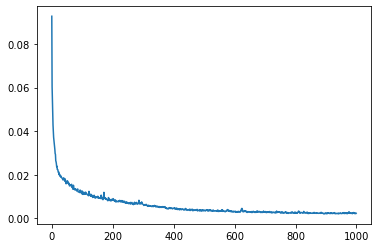

In [133]:
import matplotlib.pyplot as plt
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [134]:
from tensorflow.keras.models import load_model
model = load_model('model.hdf5')

In [135]:
train_predictions = model.predict(X_train)

5/5 [==============================] - 0s 4ms/step


In [136]:
train_predictions=train_predictions.reshape(-1,7)
train_predictions=y_scaler.inverse_transform(train_predictions)
actual=y_train.reshape(-1,7)
Actual=y_scaler.inverse_transform(actual)

In [144]:
pred=train_predictions.reshape(-1,1)
actual=Actual.reshape(-1,1)

In [145]:
actual.shape

(980, 1)

In [146]:
pred, actual=pd.DataFrame(pred), pd.DataFrame(actual)
compare=pd.merge(pred, actual, left_index=True, right_index=True)
compare.columns=['prediction','actual']
compare.head(14)

,prediction,actual
0,661.265869,531.000000
1,595.317566,443.000031
2,693.973267,554.000000
3,1218.381470,450.000000
4,2490.463623,2441.999756
5,3640.351562,3947.999756
6,1825.150879,2104.000000
7,903.166626,443.000031
8,740.030090,554.000000
9,1167.566040,450.000000


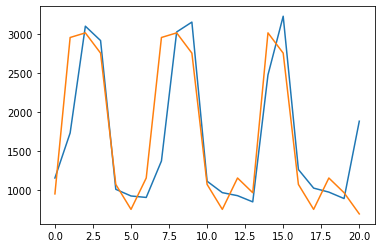

In [191]:
import matplotlib.pyplot as plt
plt.plot(compare['prediction'][:21])
plt.plot(compare['actual'][:21])

In [181]:
train_predictions = model.predict(X_test).flatten()

1/1 [==============================] - 0s 25ms/step


In [182]:
train_predictions=train_predictions.reshape(-1,7)
train_predictions=y_scaler.inverse_transform(train_predictions)

In [183]:
y_test_actual=y_test.reshape(-1,7)
Actual=y_scaler.inverse_transform(y_test_actual)

In [184]:
pred=train_predictions.reshape(-1,1)
actual=Actual.reshape(-1,1)

In [185]:
pred=pd.DataFrame(pred)
actual=pd.DataFrame(actual)

In [186]:
compare=pd.merge(pred, actual, left_index=True, right_index=True)
compare.columns=['prediction','actual']
compare.head(7)

,prediction,actual
0,1157.079712,954.0
1,1732.748901,2953.0
2,3097.188721,3012.0
3,2913.547852,2753.0
4,1012.540405,1075.0
5,927.275452,756.0
6,908.577454,1157.0


0    12660.0
dtype: float64

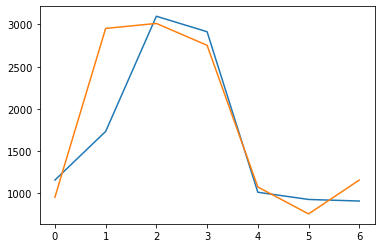

In [198]:
plt.plot(compare['prediction'][:7])
plt.plot(compare['actual'][:7])
actual.iloc[0:7].sum()


In [199]:
pred.iloc[0:7].sum()-actual.iloc[0:7].sum()

0   -911.041992
dtype: float64